# Minimos Cuadrados Regularizado

$$ f(x_i) = w_0 + w_1 x + w_2 x^2 + w_3 x^3  + \dots$$

Coste Modificado

$$ L' = L + \lambda w^T w $$

Minimizando esta función de coste, obtenemos una nueva forma de obtener los costes de la función


$$ \hat{w} = (x^T X + N \lambda I)^{-1}x^T t $$


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'no-latex'])

> Minímos Cuadrados Regularizado

In [86]:
#Nos entrega los costes de la función
def w_matrix_regular(x, y, lambd,n= 1):
    N = len(x)
    datax = [x**(i) for i in range(n+1)]
    X = np.vstack(datax).T
    #Implementamos el modelo en forma matricial
    w = np.linalg.inv(X.T @ X + N*lambd*np.eye(X.shape[1])) @ X.T @ y    

    return w

data = np.loadtxt('../Data/olympic100m_men.txt', delimiter=',').T

x = (data[0] - 1896)/4
y = data[1]

In [87]:
w_matrix_regular(x, y, .5, n=3)

array([ 2.24094226,  1.99473519, -0.13308934,  0.00259577])

In [90]:
def poly(x, weights):
    
    y_p = 0
    for i in range(len(weights)):
        y_p += weights[i]*x**(i)
        
    return y_p 

x_aux = np.linspace(np.min(x), np.max(x), 250)

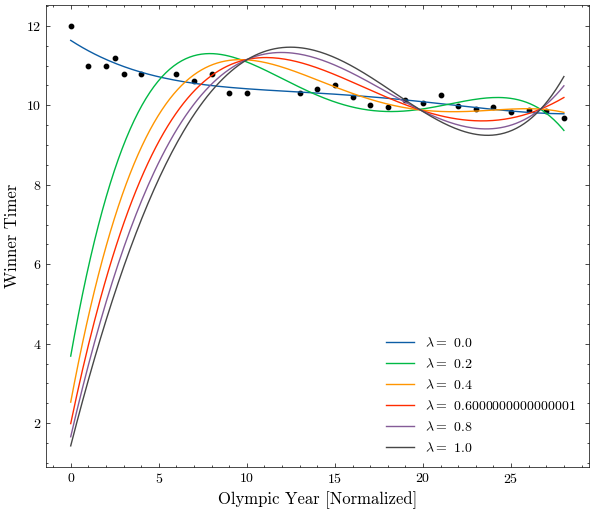

In [96]:
fig = plt.figure(figsize=(7, 6))
plt.scatter(x, y, color = 'black', s = 10)

lambdas = np.arange(0, 1.1, .2)
for l in lambdas:
    plt.plot(x_aux, poly(x_aux ,w_matrix_regular(x, y, l, n=4)), label = r'$\lambda =$ {}'.format(l))


plt.legend()

plt.xlabel('Olympic Year [Normalized]', fontsize = 12)
plt.ylabel('Winner Timer', fontsize = 12);

In [35]:
lambdas

array([0. , 0.2, 0.4, 0.6, 0.8])

### Mínimos Cuadrados
#### - Descenso de Gradiente

Vamos a buscar minimizar la siguiente función de peso
$$ L = \frac{1}{2N} \sum_{i} (f(x_i;w) - t_i)^2 $$

Objetivo: Minimizo L como función de w

Iteramos el peso, en función de los parametrós, queremos encontrar el mínimo en el espacio de parametros

\begin{gather*}
    w_0 = w_{0,0} - \alpha \frac{\partial L}{\partial w_0} \\
    w_0 = w_{1,0} - \alpha \frac{\partial L}{\partial w_1} \\ 
    \vdots \qquad \vdots \\
    w_n = w_{n, 0} - \alpha \frac{\partial L}{\partial w_n}

\end{gather*}

¿Cómo sabemos cuando parar las iteraciones? 

$$ |w_0 - w_{n, 0}| \ll \epsilon $$